# Face Recognition

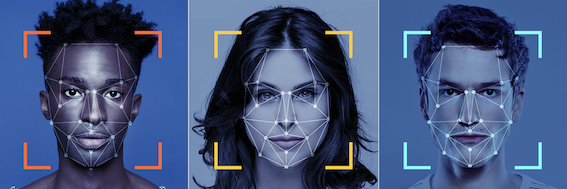

In this project you'll dive into face recognition framework and train neural network for face recognition task, play with losses and metrics.

We will train neural network on [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). 

As you see on the site, images of celebA dataset look like this:


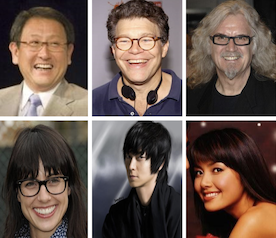

But we won't train a neural network for face recognition on those images. We'll need to preprocess them first. Let's see why we need it and how we need to preprocess them.

Let's look at how face recognition systems work:

## Face recognition model training and inference setup

This section describes how face recognition models are trained, what data alignment is and how the inference of face recognition model looks like. If you are familiar with this, you can skip this section.

### Model training

To train face recognition model on any facial dataset images must be aligned first. This step is very important to achieve a good quality of face recognition.

What is alignment: it consists of three steps:
1. Given image, identify facial landmarks on the image (coordinates of eyes, nose and mouth points). Separate neural network can be used there which was trained to identify landmarks on facial images. You can refer to [PyTorch Landmarks tutorial](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html) to see how this works.
2. Rotate all the images in the dataset so that eyes of the person on every image lie on a certain pre-defined horizontal line.
3. Scale all the images in the dataset so that the size of the faces are approximately identical.

Here's an example of what we would get after alignment of all the images of Aaron Peirsol from our dataset:

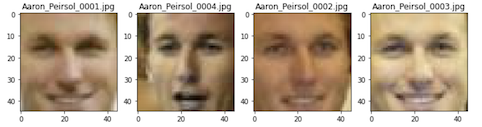

You see that eyes of all the faces lie on one horizontal line and all the faces have almost the same size. If we align all the images in the dataset, we can then train a neural network on aligned images.

**Why we need the alignment procedure**: the alignment of all faces in dataset makes the task of facial recognition easier for the model. If all the faces that model sees are of the same size and have their landmarks (eyes, nose, etc) on almost the same parts of the images, it is easier for the model to learn to identify a person on the image. The model diesn't need to "search" for the face and eyes positions on the image befire performing a recognition.

If you are interested, you can also train a model on non-aligned images, but you'll see that it would perform badly. It is possible though to train a model for face recognition without pre-alignment of all the faces, but this would require a huge amount of data — more that almost any company has. The only company that has openly presented its face recognition system that does not require special alignment is Facebook — their neural network was trained on a really huge amount of data using a special trick to avoid alignment. You can read more details [here](https://research.fb.com/publications/deepface-closing-the-gap-to-human-level-performance-in-face-verification/)

### Model inference

So let's see how the model trained on aligned faces can be used in real world:

Let's assume you owe a company and you want to build a face recognition system for your working office. You decided to hang some cameras around the office and want them to be able to recognize faces of all your employees when they are sitting / walking around the office (we let you decide by yourself why you would need such a system in your office)


A system for face recognition typically conststs of 3 stages:
- face detection
- face alignment
- face recognition

Let's discuss them in detail:

**Face detection**

When the camera is hanged on the wall it records a video and splits the video into single images, like this:

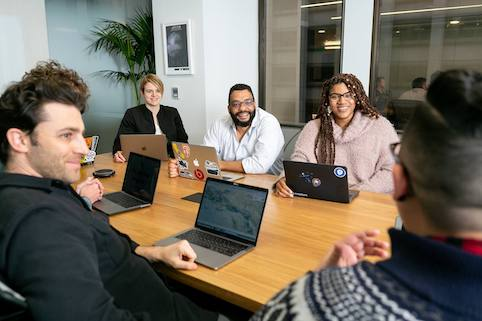

To be able to recognize all the faces on the photo you need first to detect all the faces that are present on the photo, like this:

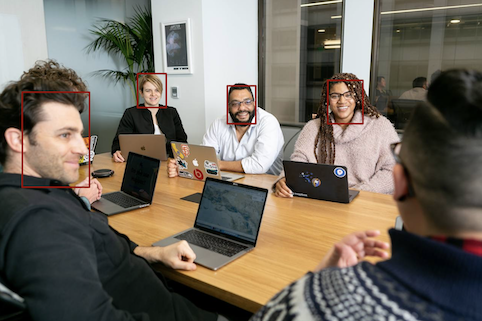

That is the first part — detection. You could use any neural network that can detect humans for this.

**Face alignment**

The second stage is to align all the faces found. The alignment procedure here should be the same as used to align training images.

So we'll get an image of a guy on a photo aligned like this:

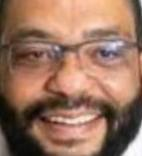

**Face recognition**

On the third stage we use the neural network that we trained to recognize a face.

So that's how the face recognition models pipeline work. You can also read about it more on [this link](https://www.nytimes.com/wirecutter/blog/how-facial-recognition-works/) (and using internet search)

## Neural network model architecture 

Let's discuss how model for face recognition should look like.



The easiest and, actually, the most used way to build a neural network for face recognition is to build it as a **simple classifier**.

Assume we have a dataset with photos of N different people. Then we can build a neural network to classify all the images from the dataset into N classes. Each class refers to one unique person in the dataset.

**How do we recognize new people by this network then?** We actually want the network for face recognition to be able to recognize not only the people which are in training set, but almost every person in the world.

That is how: after training the model, we'll drop it's last classification layer. After that when we'll pass an image of the person through network, we'll get the output of the pre-last layer — it's **the embedding of the image**. Having embeddings of two different images we can compare them using **cosine distance**. The less the distance is — the higher the probability that those two photos belong to one person is. 

Using that technique we can get embeddings of every image — even of unseen people, compare them, and reveal images belonging to same people. 

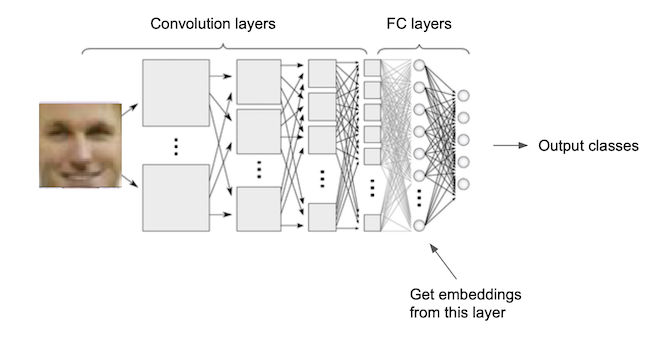

## Task 1 (30% points): build a neural network for faces classification as discribed above.

### Dataset 

We will train out face recognition network on part of the [CelebA dataset](https://mmlab.ie.cuhk.edu.hk/projects/CelebA.html). But we'll use a version of it that has all the images in it aligned and cropped. You can download the dataset using this link: https://disk.yandex.ru/d/S8f03spLIA1wrw

In [ ]:
# Get link to dataset
import requests
from urllib.parse import urlencode

def get_download_link(public_url):
    """
    Function to prepare downloading link from public yandex disk link
    """
    API_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' # Yandex API url
    
    url = API_url + urlencode(dict(public_key=public_url)) # get full url
    response = requests.get(url) # request for downloading link
    download_url = response.json()['href'] # parse the  downloading link
    return download_url

# Download and unzip dataset
public_url = 'https://disk.yandex.ru/d/FVFucEDrZaxI9g' # Yandex disk public link url
download_link = get_download_link(public_url)

! wget "{download_link}" -O celebA.zip
! unzip -q celebA.zip

--2022-02-13 15:34:34--  https://downloader.disk.yandex.ru/disk/1c0fb5bb8bdde85486f946f4250b110ef70368850cebe21f0814234d5b1a575b/62095d4a/aZ8Akc9CqtcaAMvg9MkExb-ZXFJYNWenUWJ_dbR92U4Li0Fm9ILKkVrnJJYE3VZWsNkdU6Gc2QUgXQTMgBkqjw%3D%3D?uid=0&filename=celebA_train_1k.zip&disposition=attachment&hash=PfmOewm6R2ULQcsn/YzTYJAc1RAPeCDt%2Bp28Gx92u6wDzG5HjZYUVPYC93xmi%2BwEq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=179856800&hid=f0124eac823ad5b8355d598606e9183d&media_type=compressed&tknv=v2
Resolving downloader.disk.yandex.ru (downloader.disk.yandex.ru)... 77.88.21.127, 2a02:6b8::2:127
Connecting to downloader.disk.yandex.ru (downloader.disk.yandex.ru)|77.88.21.127|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s263vla.storage.yandex.net/rdisk/1c0fb5bb8bdde85486f946f4250b110ef70368850cebe21f0814234d5b1a575b/62095d4a/aZ8Akc9CqtcaAMvg9MkExb-ZXFJYNWenUWJ_dbR92U4Li0Fm9ILKkVrnJJYE3VZWsNkdU6Gc2QUgXQTMgBkqjw==?uid

Let's look at the data first:

In [ ]:
! ls celebA_train_1k/

celebA_anno.txt  celebA_imgs  celebA_train_split.txt


- celebA_imgs — folder with aligned images 
- celebA_anno.txt — file with annotations: which person each image corresponds to
- celebA_train_split.txt — file with train/val/test info

In [ ]:
import os
import cv2
import numpy as np
from PIL import Image
from skimage import io, transform

import torch
import torchvision.transforms as transforms
from torch.utils.data import Dataset

import matplotlib.pyplot as plt

import os
from tqdm.autonotebook import tqdm, trange
import time

from collections import defaultdict
import random

from google.colab import drive
drive.mount('/content/gdrive/')

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
use_gpu = torch.cuda.is_available()

from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


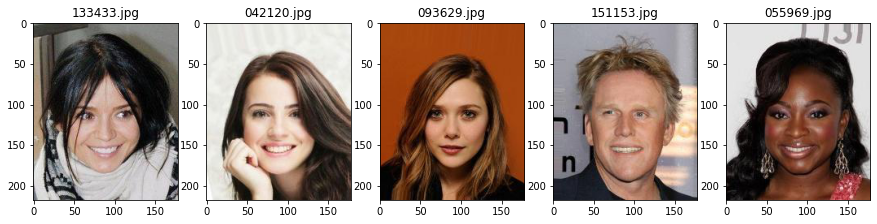

In [ ]:
def show_imgs(images_names):
    imgs = []
    for img in images_names:
      img = Image.open(os.path.join('celebA_train_1k/celebA_imgs/', img))
      imgs.append(np.array(img))

    f, axes= plt.subplots(1, len(imgs), figsize=(3*len(imgs),5))
    for i, axis in enumerate(axes):
        axes[i].imshow(imgs[i], cmap='gray')
        axes[i].set_title(images_names[i])
    plt.show()

images_names = os.listdir('./celebA_train_1k/celebA_imgs/')[:5]
show_imgs(images_names)


### Train Neural Network

Let's build a Datasets and network using this images:

In [ ]:
def get_paths(dataset_type='train'):
    '''
    a function that returnes list of images paths for a given type of the dataset
    params:
      dataset_type: one of 'train', 'val', 'test'
    '''

    labels_dict = {
        'train': 0,
        'val': 1,
        'test': 2,
    }

    f = open('celebA_train_1k/celebA_train_split.txt', 'r')
    lines = f.readlines()
    f.close()

    lines = [x.strip().split() for x in lines]
    lines = [x[0] for x in lines if int(x[1]) == labels_dict[dataset_type]]

    images_paths = []
    for filename in lines:            
        images_paths.append(os.path.join('celebA_train_1k/celebA_imgs/', filename))
    
    return np.array(images_paths)


class celebADataset(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_1k/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]
        self.transform = transform
        self.aug = aug
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = self.labels[idx]
        
        image = Image.open(img_name) 
        
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': int(label),
            }
        
        sample['image'] = self.transform(sample['image'])

        return sample

In [ ]:
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data = celebADataset('train', transform)
val_data = celebADataset('val', transform)
test_data = celebADataset('test', transform)
dataset_sizes = {
    'train': len(train_data),
    'val': len(val_data)
}

# choose your own batch_size
batch_size = 64
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_data, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)
dataloaders = {
    'train': train_loader,
    'val': val_loader
}

We'll use pretrained on VGGFace2 network InceptionResnetV1 from here: https://github.com/timesler/facenet-pytorch/tree/master/models

In [ ]:
! git clone https://github.com/timesler/facenet-pytorch.git
! mv facenet-pytorch/models ./

fatal: destination path 'facenet-pytorch' already exists and is not an empty directory.
mv: cannot stat 'facenet-pytorch/models': No such file or directory


In [ ]:
!ls models

inception_resnet_v1.py	mtcnn.py  __pycache__  utils


In [ ]:
from models import inception_resnet_v1

In [ ]:
model_inseption = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000).to(device)

In [ ]:
model_inseption

InceptionResnetV1(
  (conv2d_1a): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2a): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_2b): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (maxpool_3a): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2d_3b): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (conv2d_4a): 

In [ ]:
for param in  model_inseption.parameters():
     param.requires_grad = False

In [ ]:
for param in model_inseption.last_linear.parameters():
    param.requires_grad = True
for param in model_inseption.last_bn.parameters():
    param.requires_grad = True
for param in model_inseption.logits.parameters():
    param.requires_grad = True

In [ ]:
for param in model_inseption.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

**Workflow**: fine-tune a model on train_data using val_data for validation.Use standard CE loss.  Calculate the loss and accuracy on test set after training. 

You may use any optimizer you want and any learning rate. It is also beneficial to freeze starting layers to boost training speed and avoid overfitting. 

**To get the whole mark for this section you need to achieve 80% accuracy on test set**.

In [ ]:
from torch._C import dtype
def train(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    losses = {'train': [], "val": []}
    accuracy_resnet = {'train': [], "val": []}
    best_model_epoch = 0
    pbar = trange(num_epochs, desc="Epoch:")

    for epoch in pbar:

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in tqdm(dataloaders[phase], leave=False, desc=f"{phase} iter:"):
                # получаем картинки и метки
                inputs, labels = data['image'],  data['label']
                labels = [int(i) for i in labels]
                inputs, labels = torch.Tensor(inputs),  torch.LongTensor(labels)
                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels
                # инициализируем градиенты параметров
                if phase=="train":
                    optimizer.zero_grad()

                # forward pass
                if phase == 'val':
                    with torch.no_grad():
                        outputs = model(inputs)
                else:
                    outputs = model(inputs)
                preds = torch.argmax(outputs, -1)
                #print(outputs.shape, labels.shape)
                #print(outputs.dtype, labels.dtype)
                loss = criterion(outputs, labels)

                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]
            
            # Ваш код здесь
            losses[phase].append(epoch_loss)
            accuracy_resnet[phase].append(epoch_acc)
            
            pbar.set_description('{} Loss: {:.4f} Acc: {:.4f}'.format(
                                    phase, epoch_loss, epoch_acc
                                ))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
                best_model_epoch = epoch

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses, accuracy_resnet, best_model_epoch

In [ ]:
max_epochs = 5
optim = torch.optim.Adam(model_inseption.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, [5, 10])
model_inseption, losses_inseption, accuracy_inseption, best_model_epoch_inseption = train(model_inseption, torch.nn.CrossEntropyLoss(), optim, scheduler, max_epochs)

Epoch::   0%|          | 0/5 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/59 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/59 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/59 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/59 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/59 [00:00<?, ?it/s]

Training complete in 11m 43s
Best val Acc: 0.913544


In [ ]:
torch.save(model_inseption.state_dict(), "/content/gdrive/My Drive/Colab Notebooks/model_inseption.pth")

In [ ]:
def accuracy(preds, labels):
    return float(int(torch.sum(preds.to(device)  == labels.to(device) ))) / float(batch_size)

def score_model(model, metric, data):
    model.eval()  # testing mode
    scores = 0
    for item in data:
        inputs = item['image']
        labels = item['label']
        inputs, labels = torch.Tensor(inputs),  torch.LongTensor(labels)
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        preds = torch.argmax(outputs, -1).to(device)
        scores += metric(preds, labels)
    return scores/len(data)

In [ ]:
test_acc = score_model(model_inseption, accuracy, test_loader) # 20 sec

In [ ]:
test_acc

0.9040625

In [ ]:
def predict(model, data):
    model.eval()  # testing mode
    Y_pred = model(torch.unsqueeze(data.to(device),0))
    return Y_pred

**Cosine similarity calculation**: drop a last layer of trained network. Get embeddings for some images from train set and for images from test set. Calculate cosine similarities between embeddings corresponding to the pictures of the same person and different people. Is the difference big in any of cases?

In [ ]:
model_inseption.eval()
model_inseption.classify = False

In [ ]:
data = next(iter(dataloaders['val']))
inputs, labels = data['image'],  data['label']

In [ ]:
labels

tensor([ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,  3,  3,  3,
         3,  3,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  7,  7,
         7,  7,  7,  8,  8,  8,  8,  8,  9,  9,  9,  9, 10, 10, 10, 10, 11, 11,
        11, 12, 12, 12, 13, 13, 13, 13, 13, 14])

In [ ]:
same_im1 = inputs[0].to(device) # class 0
same_im2 = inputs[1].to(device) # class 0
other_im3 = inputs[9].to(device) # class 1

In [ ]:
out1 = model_inseption(torch.unsqueeze(same_im1,0))
out2 = model_inseption(torch.unsqueeze(same_im2,0))
out3 = model_inseption(torch.unsqueeze(other_im3,0))

In [ ]:
out1.shape, out2.shape, out3.shape

(torch.Size([1, 512]), torch.Size([1, 512]), torch.Size([1, 512]))

In [ ]:
cosineSim = torch.nn.CosineSimilarity(dim=1, eps=1e-6)
same_sim = cosineSim(out1, out2).cpu().detach().numpy()
other_sim1 = cosineSim(out1,out3).cpu().detach().numpy()
other_sim2 = cosineSim(out2,out3).cpu().detach().numpy()
print(f"Same images:  {same_sim}\nOther images: {other_sim1}, {other_sim2}")

Same images:  [0.71783525]
Other images: [0.00775436], [-0.03795592]


**Cosine similarity distribution**: calculate all the cosine similarities between images in test dataset and train dataset of the same person. This means if you have image of person #106 in test dataset, calculate all similarities between this person's embeddings from test dataset and this person's embeddings from train dataset. 

Then also do that for pairs of different people. This means if you have image of person #106 in test dataset, calculate similarities between this person's embeddings from test dataset and other people embeddings from train dataset. 

This calculation may take a long time and memory since it's a lot of pairs. You can cut the number of pairs which you calculate distances between up to 5k, as an example.

In [ ]:
def same_pair_fn(model, data1, data2):
    pair = np.array([],dtype=np.float)
    model.classify = False
    model.eval()
    for test_item1 in data1:
        input1, label1 = test_item1['image'],  [test_item1['label']]
        lb = [test_item1['label']]
        input1, label1 = torch.Tensor(input1),  torch.LongTensor(label1)
        if use_gpu:
            input1 = input1.cuda()
            label1 = label1.cuda()
        else:
            input1, label1 = input1, label1
        for test_item2 in data2:
            input2, label2 = test_item2['image'],  [test_item2['label']]
            if lb == label2:  
                input2, label2 = torch.Tensor(input2), torch.LongTensor(label2)
                if use_gpu:
                    input2 = input2.cuda()
                    label2 = label2.cuda()
                else:
                    input2, label2 = input2, label2
                out1 = model(torch.unsqueeze(input1,0)).to(device)
                out2 = model(torch.unsqueeze(input2,0)).to(device)
                same_sim = cosineSim(out1, out2).to('cpu')
                pair = np.append(pair,same_sim[0].detach().numpy())
                if(pair.size % 100 == 0):
                    print(f"Pair size: {pair.size} / 1000")
                    print(f"Pair element: {pair[-1]}")
                if pair.size == 1000:
                    return pair

In [ ]:
def other_pair_fn(model, data1, data2):
    pair = np.array([],dtype=np.float)
    model.classify = False
    model.eval()
    for test_item1 in data1:
        input1, label1 = test_item1['image'],  [test_item1['label']]
        lb = [test_item1['label']]
        input1, label1 = torch.Tensor(input1),  torch.LongTensor(label1)
        if use_gpu:
            input1 = input1.cuda()
            label1 = label1.cuda()
        else:
            input1, label1 = input1, label1
        for test_item2 in data2:
            input2, label2 = test_item2['image'],  [test_item2['label']]
            if label1 != label2:
                input2, label2 = torch.Tensor(input2), torch.LongTensor(label2)
                if use_gpu:
                    input2 = input2.cuda()
                    label2 = label2.cuda()
                else:
                    input2, label2 = input2, label2
                out1 = model(torch.unsqueeze(input1,0)).to(device)
                out2 = model(torch.unsqueeze(input2,0)).to(device)
                same_sim = cosineSim(out1, out2).to('cpu')
                pair = np.append(pair,same_sim[0].detach().numpy())
                if(pair.size % 100== 0):
                    print(f"Pair size: {pair.size} / 1000")
                    print(f"Pair element: {pair[-1]}")
                if pair.size == 1000:
                    return pair 

In [ ]:
train_pair_same = same_pair_fn(model_inseption,train_data, train_data)
#np.save('/content/gdrive/My Drive/Colab Notebooks/train_pair_same.npy', train_pair_same) 

Pair size: 100 / 1000
Pair element: 0.3885149657726288
Pair size: 200 / 1000
Pair element: 0.7126759886741638
Pair size: 300 / 1000
Pair element: 0.666538655757904
Pair size: 400 / 1000
Pair element: 0.532051682472229
Pair size: 500 / 1000
Pair element: 0.5481313467025757
Pair size: 600 / 1000
Pair element: 0.3536779284477234
Pair size: 700 / 1000
Pair element: 0.4710041284561157
Pair size: 800 / 1000
Pair element: 0.6094532608985901
Pair size: 900 / 1000
Pair element: 0.2321866750717163
Pair size: 1000 / 1000
Pair element: 0.7706809639930725


In [ ]:
train_pair_other = other_pair_fn(model_inseption,train_data, train_data)
#np.save('/content/gdrive/My Drive/Colab Notebooks/train_pair_other.npy', train_pair_other) 

Pair size: 100 / 1000
Pair element: -0.058282069861888885
Pair size: 200 / 1000
Pair element: 0.0723237618803978
Pair size: 300 / 1000
Pair element: -0.18453435599803925
Pair size: 400 / 1000
Pair element: 0.24111197888851166
Pair size: 500 / 1000
Pair element: -0.11706339567899704
Pair size: 600 / 1000
Pair element: -0.14316369593143463
Pair size: 700 / 1000
Pair element: 0.3471895754337311
Pair size: 800 / 1000
Pair element: -0.04661393538117409
Pair size: 900 / 1000
Pair element: 0.24642059206962585
Pair size: 1000 / 1000
Pair element: 0.02460417151451111


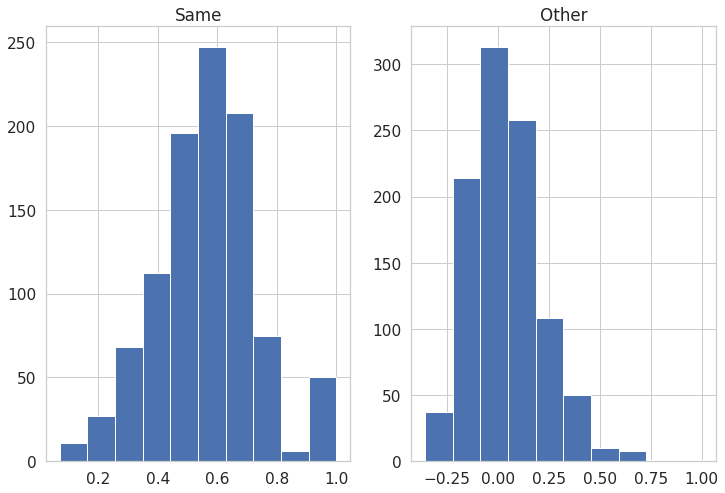

In [ ]:
plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.hist(train_pair_same)
plt.title('Same')

plt.subplot(122)
plt.hist(train_pair_other , label="")
plt.title('Other')
None

## Task 2 (20% points): Identificaton rate metric

When training the model above we used CE loss on val and test set as a measure of performance of our model. But this has a major disadvantage: we can't measure how godd a model would work on unseen faces (which are not present in training, val & test sets)

To address this we can calculate another metric for the model: **identification rate**. This is how it works:

We have two sets of faces: query and distractors. None of the faces from those sets are present in train, val or test sets.

1. calculate cosine similarities between all the faces corresponding to the same people from query dataset. This means if the person has 3 photos in query part: 01.jpg, 02.jpg, 03.jpg, then calculate 3 cosine similarities between every pair of embeddings corresponding to those photos. 
2. calculate cosine similarities between all the faces corresponding to the different people from query dataset. 
3. calculate cosine similarities between all the pairs of embeddings corresponding to query and distractors. This means calculate similarities between pairs (q, d), where q is the embedding that corresponds to a face from query, d — embedding that corresponds to a face from distractors. You'll get |query|*|distractors| similarities.
4. Sum numbers of similarities from 2 and 3 stages. This is a number of false pairs.
5. fix **FPR** (false positive rate). Let it be 0.01 in our case. FPR multiplied by a number of false pairs from the stage 4 is the number of false positives we would allow our model to make. Let's call this number N
6. Sort all the similarities of false pairs by descending order. Get the Nth element from the beginning — that's our **threshold similarity**.
7. Calculate how many positive similarities from stage 1 are equal or more that threshold. Divide this number by whole number of positive similarities from stage 1. This is TPR (true positive rate) — our metric.

This metric can also be expressed as TPR@FPR=0.01. FPR can vary. 

Datasets (query photos, query labels & distructors photos) you can download from here: https://disk.yandex.ru/d/C54mClLmQkag6Q

**Task**: implement the TPR@FPR metric. Calculate it for your model and test dataset on FPR=[0.5, 0.2, 0.1, 0.05].

There're some functions pre-defined and some tests given for better understanding. Please don't change the functions prototypes, so that you can use asserts for checking.

In [ ]:
# Get link to dataset
import requests
from urllib.parse import urlencode

def get_download_link(public_url):
    """
    Function to prepare downloading link from public yandex disk link
    """
    API_url = 'https://cloud-api.yandex.net/v1/disk/public/resources/download?' # Yandex API url
    
    url = API_url + urlencode(dict(public_key=public_url)) # get full url
    response = requests.get(url) # request for downloading link
    download_url = response.json()['href'] # parse the  downloading link
    return download_url

# Download and unzip dataset
public_url = 'https://disk.yandex.ru/d/C54mClLmQkag6Q' # Yandex disk public link url
download_link = get_download_link(public_url)

! wget "{download_link}" -O celebA_ir.zip
! unzip -q celebA_ir.zip

--2022-02-13 16:40:17--  https://downloader.disk.yandex.ru/disk/af8cf9d358d08814284101cd2a3e333f686e1c891f275808aa4ec034ddb30192/62096cb1/aZ8Akc9CqtcaAMvg9MkExUS0nM-Qw6vBjH2cBgsvJt4L8iF-6XTumJI9B01yJilqrXxNRYEGr_S1T7X9_fQXiQ%3D%3D?uid=0&filename=celebA_ir.zip&disposition=attachment&hash=MCgzRvhQiUJarz9o08OG/sEcpdPhcvZdM1R/Ra2e2NF0ybsUoL/BrSQw424Y62pLq/J6bpmRyOJonT3VoXnDag%3D%3D%3A&limit=0&content_type=application%2Fzip&owner_uid=316082386&fsize=75566735&hid=5e690094946e8e9da28436cde7a2724a&media_type=compressed&tknv=v2
Resolving downloader.disk.yandex.ru (downloader.disk.yandex.ru)... 77.88.21.127, 2a02:6b8::2:127
Connecting to downloader.disk.yandex.ru (downloader.disk.yandex.ru)|77.88.21.127|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://s339vla.storage.yandex.net/rdisk/af8cf9d358d08814284101cd2a3e333f686e1c891f275808aa4ec034ddb30192/62096cb1/aZ8Akc9CqtcaAMvg9MkExUS0nM-Qw6vBjH2cBgsvJt4L8iF-6XTumJI9B01yJilqrXxNRYEGr_S1T7X9_fQXiQ==?uid=0&filename

In [ ]:
from collections import defaultdict

# file with query part annotations: which image belongs to which class
# format: 
#     image_name_1.jpg 2678
#     image_name_2.jpg 2679
f = open('./celebA_ir/celebA_anno_query.txt', 'r')
query_lines = f.readlines()
f.close()
query_lines = [x.strip().split() for x in query_lines]
# plain list of image names from query. Neede to compute embeddings for query
query_img_names = [x[0] for x in query_lines]
query_labels = [int(x[1]) for x in query_lines]
# dictionary with info of which images from query belong to which class
# format:
#     {class: [image_1, image_2, ...]}
query_dict = defaultdict(list)
for img_name, img_class in query_lines:
  query_dict[img_class].append(img_name)

# list of distractor images
distractors_img_names = os.listdir('./celebA_ir/celebA_distractors') 

In [ ]:
def compute_embeddings(model, images_list):
  '''
  compute embeddings from the trained model for list of images.
  params:
    model: trained nn model that takes images and outputs embeddings
    images_list: list of images paths to compute embeddings for
  output:
    list: list of model embeddings. Each embedding corresponds to images 
          names from images_list
  '''
  data = celebADataset('train', images_list)
  model.classify = False
  for idx, image in enumerate(images_list):
    input = Image.open(image)
    input = transform(input)
    input = input.to(device)
    model.eval()
    outputs = model(torch.unsqueeze(input,0)).to('cpu')
    if idx == 0:
       embeddings_array = np.array(outputs.detach().numpy(), dtype=np.float)
       continue
    #print(outputs.detach().numpy().reshape(512))
    #print( outputs.detach().numpy().reshape(512).shape)
    embeddings_array = np.concatenate((embeddings_array, outputs.detach().numpy()))
    if idx % 100 == 0:
      print(f"Сurrent position: {idx}/{len(images_list)}")
      print(f"Shape: {embeddings_array.shape}")
  return embeddings_array

In [ ]:
query_img_names_paths = []
distractors_img_names_paths = []
for image in  query_img_names:
  query_img_names_paths.append(os.path.join('./celebA_ir/celebA_query/', image))
for image in  distractors_img_names:
  distractors_img_names_paths.append(os.path.join('./celebA_ir/celebA_distractors/', image))

In [ ]:
query_embeddings = compute_embeddings(model,query_img_names_paths)

In [ ]:
#np.save('/content/gdrive/My Drive/Colab Notebooks/query_embeddings.npy', query_embeddings) 

In [ ]:
query_embeddings = np.load('/content/gdrive/My Drive/Colab Notebooks/ query_embeddings.npy',allow_pickle='TRUE')

In [ ]:
query_embeddings.shape

(7198, 512)

In [ ]:
distractors_embeddings = compute_embeddings(model_inseption, distractors_img_names_paths)

Сurrent position: 100/23397
Shape: (101, 512)
Сurrent position: 200/23397
Shape: (201, 512)
Сurrent position: 300/23397
Shape: (301, 512)
Сurrent position: 400/23397
Shape: (401, 512)
Сurrent position: 500/23397
Shape: (501, 512)
Сurrent position: 600/23397
Shape: (601, 512)
Сurrent position: 700/23397
Shape: (701, 512)
Сurrent position: 800/23397
Shape: (801, 512)
Сurrent position: 900/23397
Shape: (901, 512)
Сurrent position: 1000/23397
Shape: (1001, 512)
Сurrent position: 1100/23397
Shape: (1101, 512)
Сurrent position: 1200/23397
Shape: (1201, 512)
Сurrent position: 1300/23397
Shape: (1301, 512)
Сurrent position: 1400/23397
Shape: (1401, 512)
Сurrent position: 1500/23397
Shape: (1501, 512)
Сurrent position: 1600/23397
Shape: (1601, 512)
Сurrent position: 1700/23397
Shape: (1701, 512)
Сurrent position: 1800/23397
Shape: (1801, 512)
Сurrent position: 1900/23397
Shape: (1901, 512)
Сurrent position: 2000/23397
Shape: (2001, 512)
Сurrent position: 2100/23397
Shape: (2101, 512)
Сurrent po

In [ ]:
#np.save('/content/gdrive/My Drive/Colab Notebooks/distractors_embeddings.npy', distractors_embeddings) 

In [ ]:
distractors_embeddings = np.load('/content/gdrive/My Drive/Colab Notebooks/distractors_embeddings.npy',allow_pickle='TRUE')

In [ ]:
def compute_cosine_query_pos(query_dict, query_img_names, query_embeddings, query_labels):
  '''
  compute cosine similarities between positive pairs from query (stage 1)
  params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
  output:
    list of floats: similarities between embeddings corresponding 
                    to the same people from query list
  '''
  similarities = np.array([], dtype=np.float)
  for key, value in query_dict.items():
    for id, i  in enumerate(value):
      for idx, j in enumerate(value):
        if(id < idx):
          res = cosineSim(torch.unsqueeze(torch.Tensor(query_embeddings[query_img_names.index(i)]),0), torch.unsqueeze(torch.Tensor(query_embeddings[query_img_names.index(j)]),0))
          similarities = np.append(similarities, res)
  return similarities


In [ ]:
def compute_cosine_query_neg(query_dict, query_img_names, query_embeddings, query_labels):
  '''
  compute cosine similarities between negative pairs from query (stage 2)
  params:
    query_dict: dict {class: [image_name_1, image_name_2, ...]}. Key: class in 
                the dataset. Value: images corresponding to that class
    query_img_names: list of images names
    query_embeddings: list of embeddings corresponding to query_img_names
  output:
    list of floats: similarities between embeddings corresponding 
                    to different people from query list
  '''
  similarities = cosine_similarity(query_embeddings, query_embeddings).reshape(len(query_labels),len(query_labels))
  similarities = pd.DataFrame(similarities, index=query_labels, columns=query_labels)
  for rowid, i in enumerate(similarities.index):
      if(rowid % 100 == 0):
        print(f"{rowid}/{len(similarities.index)}")
      for colid, j in enumerate(similarities.columns):
          if((i == j) or (rowid > colid)):
              similarities.at[i,j] = np.nan
  similarities = similarities.to_numpy().flatten()
  similarities = similarities[~np.isnan(similarities)]
  return similarities

In [ ]:
cosineSim = torch.nn.CosineSimilarity(dim=1, eps=1e-6)

In [ ]:
def compute_cosine_query_distractors(query_embeddings, distractors_embeddings):
  '''
  compute cosine similarities between negative pairs from query and distractors
  (stage 3)
  params:
    query_embeddings: list of embeddings corresponding to query_img_names
    distractors_embeddings: list of embeddings corresponding to distractors_img_names
  output:
    list of floats: similarities between pairs of people (q, d), where q is 
                    embedding corresponding to photo from query, d —
                    embedding corresponding to photo from distractors
  '''
  return cosine_similarity(query_embeddings, distractors_embeddings).reshape(len(query_embeddings),len(distractors_embeddings)).flatten()

In [ ]:
cosine_query_pos = compute_cosine_query_pos(query_dict, query_img_names, 
                                            query_embeddings, query_labels)
#np.save('/content/gdrive/My Drive/Colab Notebooks/cosine_query_pos.npy', cosine_query_pos)

In [ ]:
cosine_query_pos = np.load('/content/gdrive/My Drive/Colab Notebooks/cosine_query_pos.npy',allow_pickle='TRUE')

In [ ]:
cosine_query_neg = compute_cosine_query_neg(query_dict, query_img_names, 
                                            query_embeddings,query_labels)
#np.save('/content/gdrive/My Drive/Colab Notebooks/cosine_query_neg.npy', cosine_query_neg) 

In [ ]:
cosine_query_neg = np.load('/content/gdrive/My Drive/Colab Notebooks/cosine_query_neg.npy',allow_pickle='TRUE')

In [ ]:
cosine_query_distractors = compute_cosine_query_distractors(query_embeddings, 
                                                            distractors_embeddings)
#np.save('/content/gdrive/My Drive/Colab Notebooks/cosine_query_distractors.npy', cosine_query_distractors)

In [ ]:
cosine_query_distractors = np.load('/content/gdrive/My Drive/Colab Notebooks/cosine_query_distractors.npy',allow_pickle='TRUE')

Check you code of functions which compute similarities:

In [ ]:
test_query_dict = {
    2876: ['1.jpg', '2.jpg', '3.jpg'],
    5674: ['5.jpg'],
    864:  ['9.jpg', '10.jpg'],
}
test_query_img_names = ['1.jpg', '2.jpg', '3.jpg', '5.jpg', '9.jpg', '10.jpg']
q_l = [2876,2876,2876,5674,864,864]
test_query_embeddings = [
                    [1.56, 6.45,  -7.68],
                    [-1.1 , 6.11,  -3.0],
                    [-0.06,-0.98,-1.29],
                    [8.56, 1.45,  1.11],
                    [0.7,  1.1,   -7.56],
                    [0.05, 0.9,   -2.56],
]

test_distractors_img_names = ['11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg']

test_distractors_embeddings = [
                    [0.12, -3.23, -5.55],
                    [-1,   -0.01, 1.22],
                    [0.06, -0.23, 1.34],
                    [-6.6, 1.45,  -1.45],
                    [0.89,  1.98, 1.45],
]

test_cosine_query_pos = compute_cosine_query_pos(test_query_dict, test_query_img_names, 
                                            test_query_embeddings,q_l)
test_cosine_query_neg = compute_cosine_query_neg(test_query_dict, test_query_img_names, 
                                            test_query_embeddings,q_l)
test_cosine_query_distractors = compute_cosine_query_distractors(test_query_embeddings, 
                                                            test_distractors_embeddings)

0/6


In [ ]:
true_cosine_query_pos = [0.8678237233650096, 0.21226104378511604,
                         -0.18355866977496182, 0.9787437979250561]
assert np.allclose(sorted(test_cosine_query_pos), sorted(true_cosine_query_pos)), \
      "A mistake in compute_cosine_query_pos function"

true_cosine_query_neg = [0.15963231223161822, 0.8507997093616965, 0.9272761484302097,
                         -0.0643994061127092, 0.5412660901220571, 0.701307100338029,
                         -0.2372575528216902, 0.6941032794522218, 0.549425446066643,
                         -0.011982733001947084, -0.0466679194884999]
assert np.allclose(sorted(test_cosine_query_neg), sorted(true_cosine_query_neg)), \
      "A mistake in compute_cosine_query_neg function"

true_cosine_query_distractors = [0.3371426578637511, -0.6866465610863652, -0.8456563512871669,
                                 0.14530087113136106, 0.11410510307646118, -0.07265097629002357,
                                 -0.24097699660707042,-0.5851992679925766, 0.4295494455718534,
                                 0.37604478596058194, 0.9909483738948858, -0.5881093317868022,
                                 -0.6829712976642919, 0.07546364489032083, -0.9130970963915521,
                                 -0.17463101988684684, -0.5229363015558941, 0.1399896725311533,
                                 -0.9258034013399499, 0.5295114163723346, 0.7811585442749943,
                                 -0.8208760031249596, -0.9905139680301821, 0.14969764653247228,
                                 -0.40749654525418444, 0.648660814944824, -0.7432584300096284,
                                 -0.9839696492435877, 0.2498741082804709, -0.2661183373780491]
assert np.allclose(sorted(test_cosine_query_distractors), sorted(true_cosine_query_distractors)), \
      "A mistake in compute_cosine_query_distractors function"

Implement the final function: identification rate calculation

In [ ]:
def compute_ir(cosine_query_pos, cosine_query_neg, cosine_query_distractors, 
               fpr=0.1):
  '''
  compute identification rate using precomputer cosine similarities between pairs
  at given fpr
  params:
    cosine_query_pos: cosine similarities between positive pairs from query
    cosine_query_neg: cosine similarities between negative pairs from query
    cosine_query_distractors: cosine similarities between negative pairs 
                              from query and distractors
    fpr: false positive rate at which to compute TPR
  output: 
    float: threshold for given fpr 
    float: TPR at given FPR
  '''
  false_pair_num = cosine_query_neg.size + cosine_query_distractors.size
  N = int(fpr * false_pair_num)
  false_pair = np.concatenate((cosine_query_neg, cosine_query_distractors))
  false_pair[::-1].sort(kind='heapsort')
  threshold = false_pair[N]
  return threshold, float(sum(cosine_query_pos >= threshold)) / cosine_query_pos.size
  
  

Check yourself:

In [ ]:
test_thr = []
test_tpr = []
for fpr in [0.5, 0.3, 0.1]:
  x, y = compute_ir(test_cosine_query_pos, test_cosine_query_neg, 
                    test_cosine_query_distractors, fpr=fpr)
  test_thr.append(x)
  test_tpr.append(y)

In [ ]:
true_thr = [-0.011982733001947084, 0.3371426578637511, 0.701307100338029]
assert np.allclose(np.array(test_thr), np.array(true_thr)), "A mistake in computing threshold"

true_tpr = [0.75, 0.5, 0.5]
assert np.allclose(np.array(test_tpr), np.array(true_tpr)), "A mistake in computing tpr"

Finally compute tpr for faces query and distractors dataset and fpr = [0.5, 0.2, 0.1, 0.05]:

In [ ]:
thr = []
tpr = []
for fpr in [0.5, 0.2, 0.1, 0.05]:
  x, y = compute_ir(cosine_query_pos, cosine_query_neg, 
                    cosine_query_distractors, fpr=fpr)
  thr.append(x)
  tpr.append(y)

In [ ]:
#np.save('/content/gdrive/My Drive/Colab Notebooks/thr.npy',  thr)
#np.save('/content/gdrive/My Drive/Colab Notebooks/tpr.npy',  tpr)

In [ ]:
thr = np.load('/content/gdrive/My Drive/Colab Notebooks/thr.npy',allow_pickle='TRUE')
tpr = np.load('/content/gdrive/My Drive/Colab Notebooks/tpr.npy',allow_pickle='TRUE')

## Task 3 (50% points): Loss functions

Building a network on task 1 we used an ordinary CE loss. But there are many more variants of loss functions that can be used to train neural network. We will discuss two of them, which are the most popular. More examples of losses for face recognition and their performance reviews you can find in this paper: https://arxiv.org/pdf/1901.05903.pdf

### TripletLoss (25% points)

This is another kind of loss which does not require a model to have last classification layer — it works directly with embeddings. It requires by design to make embeddings of one person be close on embeddings space and embeddings of different people be far away from each other. 

This loss has an advantage over CE-like losses: it does not rely on number of classes in dataset. If we have new faces of new people in a dataset, we won't need to completely retrain the network, we could just fine-tune the trained network on new photos.


**How TripletLoss works**:

Here the architecture of neural network will be slightly different than it was when we used CE loss: it won't have the last classification layer. The last layer of NN will output embeddings of the given photo. 

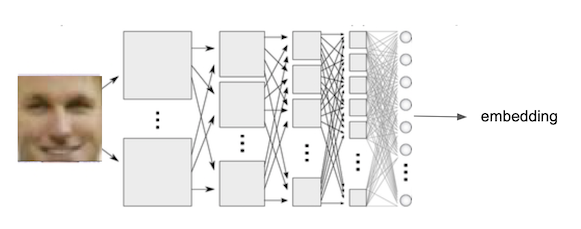

The TripletLoss function works directly with these embeddings. The idea of it is to make embeddings of the same people more close, compact in the embedding space, and the embeddings of the different people be more separate. There's a formula for the loss:

$$L(e, p, n) = max\{d(a, p) - d(a, n) + margin, 0\},$$

where 
- $e$ is embedding of a photo (output of a model)
- $p$ is a positive embedding for the photo (embedding that we want $e$ be close to)
- $n$ is a negative embedding for the photo (embedding that we want $e$ be far from)
- $d(x, y)$ is a distance measure between embeddings 
- margin — a positive margin to further boost the difference between $d(a, p)$ and $d(a, n)$

**All the embeddings $e$, $p$ and $n$ must be normalized before passing them to the loss**.

In our case for the given photo $E$ and it's embedding $e$ positive embedding $p$ must be an embedding of the photo of the same person and embedding $n$ must be an ambedding of the photo of the different person.

This emplementation of TripletLoss for PyTorch can be found [here](https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss). There are different variants of TripletLoss which can also boost performance and which you can implement by yourself, if you want:
- use more that 1 sample of $p$ and $n$ for one embedding $e$ 
- use special kinds of negatives: e.g. the negatives that are the most close to e (to boost them be further away from e)


**More to read about TripletLoss**:

The idea of TripletLoss: https://en.wikipedia.org/wiki/Triplet_loss

PyTorch implementation of TripletLoss: https://pytorch.org/docs/stable/generated/torch.nn.TripletMarginWithDistanceLoss.html#torch.nn.TripletMarginWithDistanceLoss

**Task**: implement a model and train it with TripletLoss. Play with margin parameter to achieve better results.

Which loss among which you have tried is the best?

**To get the full mark for this task you need to train a model using  TripletLoss correctly at least for one value of margin and achieve >=75% acc on test set.** 
As we don't have a classification layer in our network, we need a custom procedure for accuracy calculation. You can use one of the following procedures:
- calculate accuracy on val and test sets using KNN with embeddings from training set as training points. (easy way)
- compute mean embeddings for every class from training set and use them as reference embeddings. Then for every embedding v from val and test sets calculate cosine similarities between v and mean embeddings from train set. (the more "right" way, but requires code writing)

You can use any of those two variants.

**Hints**:
- think of what the distance function $d$ should be in our case: training a model we want it to output embeddings which can be compared using cosine similarity function. Pay attention to that cosine similarity is not a distance measure — the more cosine distance, the closer embeddings are. Think how you can put cosine distance into TripletLoss function.
- to train model using this loss you'll need to rewrite the Dataset class so it gives you not the random image and its label, but the image, positive images and negative images for this image;
- don't forget to normalize embeddings for the loss! You may even do that by adding batchnorm/layernorm to the last layer of your network

In [ ]:
class celebADataset_triplet(Dataset):
    """Feel free to rewrite it. For ex. cache all images in RAM to increase training speed"""
    def __init__(self, dataset_type, transform, aug=None,):
        self.images = get_paths(dataset_type=dataset_type)

        f = open('celebA_train_1k/celebA_anno.txt', 'r')
        labels = f.readlines()
        f.close()
        labels = [x.strip().split() for x in labels]
        labels = {x:y for x, y in labels}
        self.labels = [labels[x.split('/')[-1]] for x in self.images]
        self.transform = transform
        self.aug = aug
        self.dict_class_imgs = defaultdict(list)
        for x in self.images:
            img = x.split('/')[-1]
            img_class = labels[img]
            self.dict_class_imgs[int(img_class)].append(img)
        self.number_of_class = len(self.dict_class_imgs.keys())
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx):        
        img_name = self.images[idx]
        label = int(self.labels[idx])
        positive_images = self.dict_class_imgs[label].copy()
        #print(self.dict_class_imgs[label], img_name.split('/')[-1])
        if len(positive_images) > 1:
            positive_images.remove(img_name.split('/')[-1])
        random_class = random.randrange(1,  self.number_of_class - 2) %  self.number_of_class
        negative_images = self.dict_class_imgs[random_class]
        while len(negative_images) < 1:
            random_class = random.randrange(1,  self.number_of_class - 2) %  self.number_of_class
            negative_images = self.dict_class_imgs[random_class]
        positive_image = random.choice(positive_images)
        negative_image = random.choice(negative_images)
        image = Image.open(img_name) 
        positive_image = Image.open(os.path.join('celebA_train_1k/celebA_imgs/', positive_image))
        negative_image = Image.open(os.path.join('celebA_train_1k/celebA_imgs/', negative_image))
        if self.aug:
            sample = self.aug(
                image=image,
            )
        else:
            sample = {
                'image': image,
                'label': int(label),
                'positive_image': positive_image,
                'negative_image': negative_image
            }
        
        sample['image'] = self.transform(sample['image'])
        sample['positive_image'] = self.transform(sample['positive_image'])
        sample['negative_image'] = self.transform(sample['negative_image'])
        return sample

In [ ]:
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data_triplet = celebADataset_triplet('train', transform)
val_data_triplet = celebADataset_triplet('val', transform)
test_data_triplet = celebADataset_triplet('test', transform)
dataset_sizes = {
    'train': len(train_data_triplet),
    'val': len(val_data_triplet)
}

# choose your own batch_size
batch_size = 64
train_loader_triplet = torch.utils.data.DataLoader(train_data_triplet, batch_size=batch_size, shuffle=True)
val_loader_triplet = torch.utils.data.DataLoader(val_data_triplet, batch_size=batch_size, shuffle=False)
test_loader_triplet = torch.utils.data.DataLoader(test_data_triplet, batch_size=batch_size, shuffle=False)
dataloaders_triplet = {
    'train': train_loader_triplet,
    'val': val_loader_triplet
}

In [ ]:
def get_dict_class_imgs(dataset_type='train'):
    train_images = get_paths(dataset_type)
    f = open('celebA_train_1k/celebA_anno.txt', 'r')
    lines = f.readlines()
    f.close()
    lines = [x.strip().split() for x in lines]
    lines = {x:y for x, y in lines}
    labels = [lines[x.split('/')[-1]] for x in train_images]
    dict_class_imgs = defaultdict(list)
    for x in train_images:
        img = x.split('/')[-1]
        img_class = lines[img]
        dict_class_imgs[int(img_class)].append(img)
    return dict_class_imgs

In [ ]:
dict_class_imgs = get_dict_class_imgs(dataset_type='train')

In [ ]:
def get_mean_embedding(model, value, transform):
  #'''Выдаёт средний эмбеддинт по списку одного класса'''
    model.eval()
    model.classify =False
    flag = True
    for input in value:
        input  = Image.open(os.path.join('celebA_train_1k/celebA_imgs/',input))
        input = transform(input)
        input = input.to(device)
        output = predict(model,input).cpu().detach().numpy()
        if flag:
            e = np.array(output, dtype=np.float)
            flag = False
            continue
        e = np.concatenate((e, output))
    return e.mean(axis=0)

In [ ]:
def get_dict_class_embeddings(model, dict_class_imgs, transform):
  #'''Словарь со средними эмбеддингами для каждого класса'''
    class_embeddings = defaultdict(list)
    for key, value in dict_class_imgs.items():
        embedding = get_mean_embedding(model, value, transform)
        class_embeddings[key] = embedding
    return class_embeddings

In [ ]:
dict_class_embeddings = get_dict_class_embeddings(model_inseption, dict_class_imgs, transform)

In [ ]:
import pickle
#a_file = open("/content/gdrive/My Drive/Colab Notebooks/dict_class_embeddings", "wb")
#pickle.dump(dict_class_embeddings, a_file)
#a_file.close()

a_file = open("/content/gdrive/My Drive/Colab Notebooks/dict_class_embeddings", "rb")
dict_class_embeddings  = pickle.load(a_file)
a_file.close()

In [ ]:
triplet_loss = torch.nn.TripletMarginWithDistanceLoss(distance_function=lambda x, y: 1.0 - torch.nn.functional.cosine_similarity(x, y), margin = 0.4)

In [ ]:
def get_best_embending_class(emb_anchor, labels):
    '''Сравнивает косинусное сходство якоря со всеми средними эмбеддингами по классам и предсказывает класс(тензор из 64 классов)'''
    flag = True
    for key, value in dict_class_embeddings.items():
        if flag:
            mean_emb = np.array([dict_class_embeddings[int(key)]], dtype=np.float)
            flag = False
            continue
        mean_emb = np.concatenate((mean_emb, [dict_class_embeddings[int(key)]]))
    sim = cosine_similarity(mean_emb, emb_anchor.cpu().detach().numpy())
    sim = np.argmax(sim, axis=0)
    return sim  
    

In [ ]:
def train_triplet(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0

    losses = {'train': [], "val": []}

    pbar = trange(num_epochs, desc="Epoch:")

    for epoch in pbar:

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in tqdm(dataloaders_triplet[phase], leave=False, desc=f"{phase} iter:"):
                # получаем картинки и метки
                anchor, pos, neg, labels = data['image'],  data['positive_image'], data['negative_image'], data['label']
                anchor, pos, neg, labels = torch.FloatTensor(anchor),  torch.FloatTensor(pos), torch.FloatTensor(neg), torch.LongTensor(labels)
                # оборачиваем в переменные
                if use_gpu:
                    anchor = anchor.cuda()
                    pos = pos.cuda()
                    neg = neg.cuda()
                    labels = labels.cuda()
                else:
                    anchor, pos, neg, labels = anchor, pos, neg, labels
                # инициализируем градиенты параметров
                if phase=="train":
                    optimizer.zero_grad()
                # forward pass
                if phase == 'val':
                    with torch.no_grad():
                        emb_anchor = model(anchor)
                        emb_positive = model(pos)
                        emb_negative = model(neg)
                else:
                    emb_anchor = model(anchor)
                    emb_positive = model(pos)
                    emb_negative = model(neg)
                #print(emb_anchor.shape,  emb_positive.shape, emb_negative.shape)
                loss = criterion(emb_anchor, emb_positive, emb_negative)
                
                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optimizer.step()

                # статистика
                pred = torch.LongTensor(get_best_embending_class(emb_anchor, labels)).to(device)
                running_loss += loss.item()
                running_corrects += int(torch.sum(pred == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            losses[phase].append(epoch_loss)
            
            pbar.set_description('{} Loss: {:.4f} Acc: {:.4f}'.format(
                                    phase, epoch_loss, epoch_acc
                                ))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    return model, losses

In [ ]:
model_triplet = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=False, num_classes = 1000).to(device)

In [ ]:
max_epochs = 3
optim = torch.optim.Adam(model_triplet.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, [5, 10])
model_triplet, losses = train_triplet(model_triplet, triplet_loss, optim, scheduler, max_epochs)

In [ ]:
#torch.save(model_triplet.state_dict(), "/content/gdrive/My Drive/Colab Notebooks/model_triplet.pth")

In [ ]:
def accuracy_triplet(preds, labels):
  return float(int(torch.sum(preds.to(device)  == labels.to(device) ))) / float(batch_size)

In [ ]:
def score_model(model, metric, dataloader):
    model.eval()  # testing mode
    scores = 0
    for data in dataloader:
        anchor, pos, neg, labels = data['image'],  data['positive_image'], data['negative_image'], data['label']
        anchor, pos, neg, labels = torch.FloatTensor(anchor),  torch.FloatTensor(pos), torch.FloatTensor(neg), torch.LongTensor(labels)
        # оборачиваем в переменные
        if use_gpu:
            anchor = anchor.cuda()
            pos = pos.cuda()
            neg = neg.cuda()
            labels = labels.cuda()
        else:
            anchor, pos, neg, labels = anchor, pos, neg, labels
        with torch.no_grad():
            emb_anchor = model(anchor)
            emb_positive = model(pos)
            emb_negative = model(neg)
        pred = torch.LongTensor(get_best_embending_class(emb_anchor, labels)).to(device)
        scores += metric(pred, labels)
    return scores/len(dataloader)

In [ ]:
test_acc_triplet = score_model(model_triplet, accuracy_triplet, test_loader_triplet) # 20 sec

In [ ]:
test_acc_triplet

0.8459375

### ArcFace Loss (Additive Angular Margin Loss) (25% points)

This loss is somewhat "SOTA" for face recognition systems (somewhat — because actually different variants of losses and their combinations may be the best for different network architectures). This loss inherits idea from CE loss but further develops it to achieve better embeddings distribution on a sphere. It introduces some geodesic constraints to enhance intra-class compactness and inter-class discrepancy.



**How ArcFace loss works**:

This loss is a variation of a standard SoftMax CE loss, which enforces embeddings of different classes (people) be further away: have a more sparse representation of embeddings in embedding space, enforce more evident gap between the nearest classes.

The standard SoftMax CE loss for classification task is presented as follows:

$$L_{CE} = \frac{-1}{N}\sum_1^N \frac{e^{W_{y_i}^{T}x_i + b_{y_i}}}{\sum^n_{j=1}e^{W_j^Tx_i+b_j}},$$

where:
- $x_i \in \mathbb{R^d}$ denotes the deep feature of the $i$-th sample, belonging to the $y_i$-th class;
- $W_j \in \mathbb{R^d}$ denotes the j-th column of the weight;
- $W \in \mathbb{R^d}$ and $b_j \in \mathbb{R^d}$ is the bias term;
- $N$ — batch size;
- $n$ — class number.

It appears, that, though this loss works well, it does not explicitly optimise the feature embedding to enforce higher similarity for intra- class samples and diversity for inter-class samples, which results in a performance gap for deep face recognition under large intra-class appearance variations.

Let's do some work on this loss formula:
- fix the bias $b_j=0$;
- normalize weight ||$W_j$|| = 1;
- normalize embedding ||$x_i$|| = 1 and re-scale it to s (s is a hyperparameter)

The normalisation step on embeddings and weights makes the predictions only depend on the angle between the embedding and the weight. The learned embeddings fare thus distributed on a hypersphere with a radius of s.

So we get the following loss function now:

$$L = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos\Theta_{y_i}}}{e^{s\ cos\Theta_{y_i}} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

Final step: let's add an additive angular margin penalty $m$ between $x_i$ and $W_{y_i}$ to simultaneously enhance the intra-class compactness and inter-class discrepancy:

$$L_{ArcFace} = \frac{-1}{N}\sum_1^N \frac{e^{s\ cos(\Theta_{y_i} + m)}}{e^{s\ cos(\Theta_{y_i} + m)} + \sum^n_{j=1,\ j\ne y_i} e^{s\ cos\Theta_j}}$$

SO this is an ArcFace loss. It has 2 hyperparameters: s and m.

The original paper to read about ArcFace more precisely: https://arxiv.org/pdf/1801.07698.pdf

The original repo, where you can find a code sample: https://github.com/deepinsight/insightface

**Task**: implement a model and train it with ArcFace loss. Play with ArcFace loss parameters and see if you can beat a model with CE loss.

To get the full mark for this task you need to train a model using TripletLoss correctly at least for one value of margin and achieve >=75% acc on test set.

In [ ]:
import math

In [ ]:
def l2_norm(input,axis=1):
    norm = torch.norm(input,2,axis,True)
    output = torch.div(input, norm)
    return output

In [ ]:
class Arcface(torch.nn.Module):
    # implementation of additive margin softmax loss in https://arxiv.org/abs/1801.05599    
    def __init__(self, embedding_size=512, classnum=51332,  s=64., m=0.5):
        super(Arcface, self).__init__()
        self.classnum = classnum
        self.kernel = torch.nn.Parameter(torch.Tensor(embedding_size,classnum))
        # initial kernel
        self.kernel.data.uniform_(-1, 1).renorm_(2,1,1e-5).mul_(1e5)
        self.m = m # the margin value, default is 0.5
        self.s = s # scalar value default is 64, see normface https://arxiv.org/abs/1704.06369
        self.cos_m = math.cos(m)
        self.sin_m = math.sin(m)
        self.mm = self.sin_m * m  # issue 1
        self.threshold = math.cos(math.pi - m)
    
    def forward(self, embbedings, label):
        # weights norm
        nB = len(embbedings)
        kernel_norm = l2_norm(self.kernel, axis=0)
        # cos(theta+m)
        cos_theta = torch.mm(embbedings,kernel_norm)
        # for numerical stability
        cos_theta = cos_theta.clamp(-1,1) 
        cos_theta_2 = torch.pow(cos_theta, 2)
        sin_theta_2 = 1 - cos_theta_2
        sin_theta = torch.sqrt(sin_theta_2)
        cos_theta_m = (cos_theta * self.cos_m - sin_theta * self.sin_m)
        # this condition controls the theta+m should in range [0, pi]
        #      0<=theta+m<=pi
        #     -m<=theta<=pi-m
        cond_v = cos_theta - self.threshold
        cond_mask = cond_v <= 0
        keep_val = (cos_theta - self.mm) # when theta not in [0,pi], use cosface instead
        cos_theta_m[cond_mask] = keep_val[cond_mask]
        output = cos_theta * 1.0 # a little bit hacky way to prevent in_place operation on cos_theta
        idx_ = torch.arange(0, nB, dtype=torch.long)
        output[idx_, label] = cos_theta_m[idx_, label]
        output *= self.s # scale up in order to make softmax work, first introduced in normface
        return output

In [ ]:
model_arc = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=False, num_classes = 1000).to(device)

In [ ]:
cropped_model_arc = torch.nn.Sequential(*(list(model_arc.children())[:-5])).to(device)
for i, child in enumerate(cropped_model_arc.children()):
    if i in range(12):
        for param in child.parameters():
            param.requires_grad = False
cropped_model_arc

Sequential(
  (0): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (1): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (2): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (5): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3,

In [ ]:
for param in cropped_model_arc.parameters():
    print(param.requires_grad)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [ ]:
transform = transforms.Compose([
      # you may add anything, e.g. augmentation
      transforms.Resize(160),
      transforms.ToTensor(),
      transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),
])

train_data_arc = celebADataset('train', transform)
val_data_arc = celebADataset('val', transform)
test_data_arc = celebADataset('test', transform)
dataset_sizes_arc = {
    'train': len(train_data_arc),
    'val': len(val_data_arc)
}

# choose your own batch_size
batch_size = 64
train_loader_arc = torch.utils.data.DataLoader(train_data_arc, batch_size=batch_size, shuffle=True)
val_loader_arc = torch.utils.data.DataLoader(val_data_arc, batch_size=batch_size, shuffle=False)
test_loader_arc = torch.utils.data.DataLoader(test_data_arc, batch_size=batch_size, shuffle=False)
dataloaders_arc = {
    'train': train_loader_arc,
    'val': val_loader_arc
}

In [ ]:
def train_arc(model, num_epochs=5, lr=0.0001, s=64, m=0.5):
    since = time.time()

    best_model_wts = model.state_dict()
    best_acc = 0.0
    best_model_epoch = 0

    losses = {'train': [], "val": []}
    accuracy_arc = {'train': [], "val": []}

    pbar = trange(num_epochs, desc="Epoch:")

    criterion = torch.nn.CrossEntropyLoss()
    arc =  torch.nn.DataParallel(Arcface(1792*4*3, 1000, s=s, m=m).to(device))

    optim = torch.optim.Adam([{'params': model.parameters()},
               {'params': arc.parameters()}],
               lr=lr, weight_decay=5e-4    
              )
    scheduler = torch.optim.lr_scheduler.MultiStepLR(optim, [5, 10])
    model = torch.nn.DataParallel(model.to(device))

    for epoch in pbar:

        # каждя эпоха имеет обучающую и тестовую стадии
        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            # итерируемся по батчам
            for data in tqdm(dataloaders_arc[phase], leave=False, desc=f"{phase} iter:"):
                # получаем картинки и метки
                inputs, labels = data['image'], data['label']
                inputs, labels = torch.FloatTensor(inputs), torch.LongTensor(labels)
                # оборачиваем в переменные
                if use_gpu:
                    inputs = inputs.cuda()
                    labels = labels.cuda()
                else:
                    inputs, labels = inputs, labels
                # инициализируем градиенты параметров
                if phase=="train":
                    optim.zero_grad()
                # forward pass
                if phase == 'val':
                    with torch.no_grad():
                        embeddings = model(inputs).view(-1,1792*4*3) 
                        thetas = arc(embeddings, labels) 
                else:
                    embeddings = model(inputs).view(-1,1792*4*3) 
                    thetas = arc(embeddings, labels)            
                
                loss = criterion(thetas, labels)
                # backward pass + оптимизируем только если это стадия обучения
                if phase == 'train':
                    loss.backward()
                    optim.step()

                # статистика
                preds = torch.argmax(thetas, 1)
                running_loss += loss.item()
                running_corrects += int(torch.sum(preds == labels.data))

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects / dataset_sizes[phase]

            losses[phase].append(epoch_loss)
            accuracy_arc[phase].append(epoch_acc)
            
            pbar.set_description('{} Loss: {:.4f} Acc: {:.4f}'.format(
                                    phase, epoch_loss, epoch_acc
                                ))

            # если достиглось лучшее качество, то запомним веса модели
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()
                best_model_epoch = epoch

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # загрузим лучшие веса модели
    model.load_state_dict(best_model_wts)
    
    # Testing
    model.eval()
    test_correct = 0
    test_counter = 0
    for data in tqdm(test_loader_arc):           
        inputs, labels = data['image'], data['label']
        inputs, labels = torch.FloatTensor(inputs), torch.LongTensor(labels)
        if use_gpu:
            inputs = inputs.cuda()
            labels = labels.cuda()
        else:
            inputs, labels = inputs, labels
        embeddings = model(inputs).view(-1,1792*4*3) 
        thetas = arc(embeddings, labels) 
        preds = torch.argmax(thetas, 1)
        test_correct += torch.sum(preds == labels.data)
        test_counter += len(labels)
        test_acc = test_correct.cpu().numpy() / test_counter
    return model, losses, accuracy_arc, best_model_epoch, test_acc

In [ ]:
model_arc, losses_arc, accuracy_arc, best_model_epoch_arc, test_acc_arc = train_arc(cropped_model_arc, num_epochs=2, s=30, m=4)

Epoch::   0%|          | 0/2 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/torch/optim/lr_scheduler.py:134: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  "https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate", UserWarning)


train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/59 [00:00<?, ?it/s]

train iter::   0%|          | 0/267 [00:00<?, ?it/s]

val iter::   0%|          | 0/59 [00:00<?, ?it/s]

Training complete in 5m 24s
Best val Acc: 1.000000


  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
losses_arc

{'train': [0.0008435665333210856, 0.00044273748978131085],
 'val': [0.000953958555258316, 0.0]}

In [ ]:
accuracy_arc

{'train': [0.9980631529522245, 0.9990022303087217],
 'val': [0.9983940042826552, 1.0]}

In [ ]:
best_model_epoch_arc + 1

2

In [ ]:
test_acc_arc

1.0

In [ ]:
#torch.save(model_arc.state_dict(), "/content/gdrive/My Drive/Colab Notebooks/model_arc.pth")

In [ ]:
model_arc.load_state_dict(torch.load("/content/gdrive/My Drive/Colab Notebooks/model_arc.pth"))

## Bonus task (5% points): Finding trash photos 

You have probably noticed that in identification rate calculation we use cosine similarity between embeddings, which includes embeddings' normalization. And in TripletLoss also we normalize embeddings before passing them to the loss. Actually this is how most of the face recognition algorithms work — they are designed to output a normalized embeddings and any comparison between embeddings is done after the embeddings are normalized. Sometimes it may be beneficial even to add a normalization layer (batchnorm or layernorm with fixed parameters) after the model's embedding layer to make the model output normalized embeddings.

But norms of the unnormalized embeddings can also be used. They can be used to detect trash photos — photos, where the face is presented really badly (e.g. back of the head instead of the forehead or even a photo without any head that has appeared in a dataset due to a mistake in face detection / landmarks detection algorithm).

Empirically it has been found that the higher the embedding's norm, the more the probability of the corresponding photo to be trash is. 



**Task**: get the embeddings of photos in a test set / query set / distractors set. Sort them by their norms. Output the photos whose embeddings norms are the highest. Do they look like normal or trash?

**Doing this task will not give you points above 100% for the whole homework. But if you have any mistakes in previous sections, doing this task may give you additional points (5% of total points) to cover points lost.**

In [ ]:
resnet = inception_resnet_v1.InceptionResnetV1(pretrained='vggface2', classify=True, num_classes = 1000).to(device)
cropped_resnet = torch.nn.Sequential(*(list(resnet.children())[:-5])).to(device)

In [ ]:
cropped_resnet

Sequential(
  (0): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (1): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (2): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  (4): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU()
  )
  (5): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3,

In [ ]:
def get_embs_norms(model, loader):
    model.eval()
    with torch.no_grad():
        l = np.array([], dtype=np.float)
        for inputs in tqdm(loader):
            data = inputs['image'].to(device) #64 imgs
            outputs = model(data)
            
            for idx, item in enumerate(outputs):
                if idx == 0:
                    l = np.array([data[idx].cpu().numpy(), np.linalg.norm(np.array(item.flatten().cpu()))])
                    continue
                l = np.concatenate((l, [data[idx].cpu().numpy(), np.linalg.norm(np.array(item.flatten().cpu()))]))
              
            torch.cuda.empty_cache()                 
    return l

In [ ]:
def get_embs_norms(model, loader):
    
    # Finding mean embedding vector for each person
    model.eval()
    with torch.no_grad():
        l = []    
        for inputs in tqdm(loader):
            data = inputs['image'].to(device) #64 imgs
            
            outputs = model(data)
            
            for idx, item in enumerate(outputs):
                l.append((data[idx].cpu().numpy(), np.linalg.norm(np.array(item.flatten().cpu()))))
              
            torch.cuda.empty_cache()                 
       
            
    return np.array(l)

In [ ]:
test_embs = get_embs_norms(cropped_resnet, test_loader)
sorted_test_imgs = test_embs[test_embs[:, 1].argsort()][::-1]

  0%|          | 0/50 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
sorted_test_imgs = [torch.tensor(i) for i,j in sorted_test_imgs]

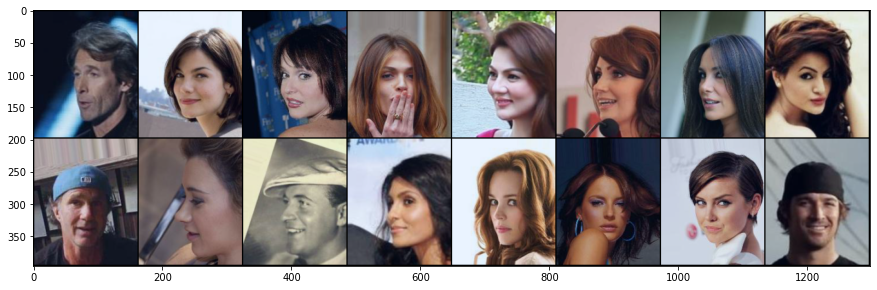

In [ ]:
import torchvision.utils as vutils
trash_from_test = vutils.make_grid(sorted_test_imgs[:16], padding=2, normalize=True)
plt.figure(figsize=(15, 10))
plt.imshow(np.transpose(trash_from_test, (1,2,0)));

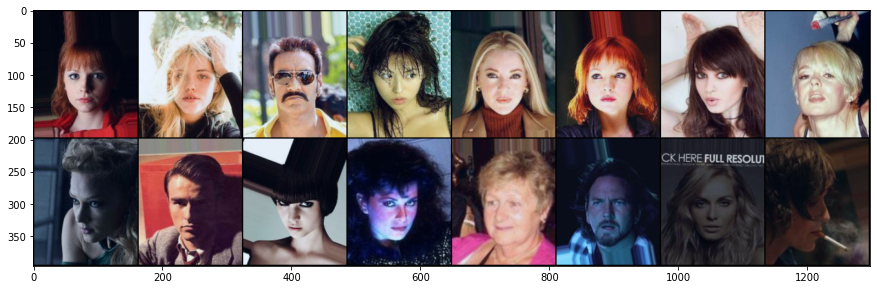

In [ ]:
trash_from_test = vutils.make_grid(sorted_test_imgs[-16:], padding=2, normalize=True)
plt.figure(figsize=(15, 10))
plt.imshow(np.transpose(trash_from_test, (1,2,0)));

In [ ]:
def get_embs(model, images_list, kind='query'):
    
   
    if kind == 'query':
        root = './celebA_ir/celebA_query/'
    elif kind =='distractor':
        root = './celebA_ir/celebA_distractors/'
    
    model.eval()
    with torch.no_grad():
        embeddings = []
        for name in tqdm(images_list):
            img = Image.open(os.path.join(root, name))
            output = model(transform(img).to(device).unsqueeze(0))
            embeddings.append((transform(img).numpy(), np.linalg.norm(output.flatten().cpu().numpy())))
            torch.cuda.empty_cache()
            
    return np.array(embeddings)     

In [ ]:
query_embs_norms = get_embs(cropped_resnet, query_img_names)

  0%|          | 0/7198 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray


In [ ]:
sorted_query_imgs = query_embs_norms[query_embs_norms[:, 1].argsort()][::-1]
sorted_query_imgs = [torch.tensor(i) for i,j in sorted_query_imgs]

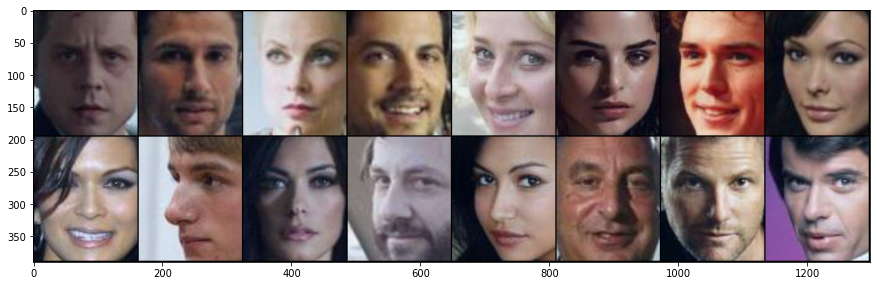

In [ ]:
import torchvision.utils as vutils
trash_from_query = vutils.make_grid(sorted_query_imgs[:16], padding=2, normalize=True)
plt.figure(figsize=(15, 10))
plt.imshow(np.transpose(trash_from_query, (1,2,0)));